<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">On The Capacity Of Feedforward Neural Networks</div>

# Vue d'Ensemble

Tout au long de ce notebook, nous allons définir et aborder la notion de **capacité** pour les réseaux de neurones denses, tout en apportant des illustrations et des exemples concrets sous forme de courts exercices pour aider à la compréhension. Nous allons traiter un résultat central sur la capacité de ces réseaux de neurones en lien avec les fonctions binaires *et nous terminerons par un tour d'horizon sur les CNN*.

#Sommaire

# Capacité : Définition et Interprétation <a id="capacité--définition-et-interprétation"></a>

## Notations

Nous utiliserons les notations suivantes pour définir nos réseaux de neurones : <br>
Soit un réseau de neurones à $L$ couches. On notera $n_k$ le nombre de noeuds à la couche $k$. <br>
Le réseau de neurones sera alors noté $A(n_1,...,n_L)$. 

<img src="img/nn.png" width="800px"></img> <br>
Par exemple, le réseau de neurone ci-dessus peut être noté $A(5, 12, 10, 1)$. 

$n_1$ correspond à la couche d'entrée et $n_L$ à celle de sortie, on peut donc considérer qu'il a $L-2$ couches cachées. On supposera durant tout le notebook que le réseau est **dense** (i.e tous les noeuds d'une couches sont connctés à tous ceux de la couche suivante) et que toutes les fonctions d'activations sont des fonctions de *Heaviside* de la forme $f (x) = h(\langle a, x\rangle + α)$ où $h(t)=1$ si $t > 0$ et $h(t)=0$ sinon, qu'on appelle aussi Perceptron de Rosenblatt.

Nous utiliserons la notation $a \asymp b$ d'égalité asymptotique qui signifie : $\exists$ $c_1, c_2 > 0$ tq. $c_1 b \leq a \leq c_2 b$ <br>
Nous noterons $H^n = \{0,1\}^n$ l'hypercube booléen.

## Théorème d'Approximation Universelle

Rappelons l'énoncé informel du théorème d'approximation universelle : 

Si $\sigma$ est une fonction d'activation non-constante, continue, bornée et monotone croissante, alors un réseau de la forme $A(m, N, n)$ peut approcher n'importe quelle fonction continue avec une précision arbitraire à condition que N puisse être arbitrairement grand. 

Plus de précisions peuvent être apportées : [Wikipedia](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_d%27approximation_universelle) et <a href="../docs/UniversalApproximationTheorem.pdf">Rappel du théorème vu en classe de DL.</a> <br>
<img src="img/approx_universelle.jpg" width="800px"></img> <br>

Ce théorème stipule qu'**en  théorie**, et sous certaines hypothèses, n'importe quelle fonction continue peut être approchée par un réseau dense à une couche cachée. Mais **en pratique**, les réseaux de neurones ont souvent plusieurs couches cachées, et certaines hypothèses ne sont plus respectées (surtout celle sur la continuité de la fonction à approcher, on préfererait approcher des fonctions plus moches...). Le notion de **capacité** permet justement de caractériser cette qualité d'approximation dans un cadre plus général et pour des réseaux de neurones à $L$ couches.

## Définition

La **capacité** d'un réseau de neurones de type $A(n_1, n_2,..., n_L)$ notée $C(A)$ est définie comme le logarithme binaire du nombre de fonctions $f : H^{n_1} \rightarrow H^{n_L}$ que le réseau est capable de calculer. <br>
<div class="alert alert alert-warning"> 

**Exercice :** Sans considérations supplémentaires, quelle est la capacité maximale théorique qu'un réseau $A(n_1, n_2,..., n_L)$ ? <br>
On s'appuiera simplement sur le dénombrement des fonctions $f : H^{n_1} \rightarrow H^{n_L}$

</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Solution (cliquez pour étendre la cellule)</b></summary>

En notant $N$ (resp. $M$) le nombre d'éléments dans $H^{n}$ (resp. $H^{m}$), il y a $N^M$ fonctions allant de $H^{m}$ dans $H^{n}$. Si l'on se donne un vecteur de $H^{n}$, chaque élément vaudra 0 ou 1, il y a donc 2 choix possibles par élément du vecteur, soit $2^n$ possibilités. Le méme raisonnement s'applique pour $H^{m}$, ce qui donne un nombre total de ${(2^n)}^{2^m} = 2^{n 2^m}$ fonctions. On a alors une capacité maximale établie à $C(A) = \log_2(2^{n_L 2^{n_1}}) = n_L 2^{n_1}$
</details>

Bien sûr, la capacité maximale calculée au-dessus est bien trop grande pour être utile (faire le calcul du nombre de fonctions allant de $H^{5}$ dans $H^{2}$) et on souhaiterait obtenir des bornes plus fines pour encadrer la capacité d'un réseau de neurone. Mais d'abord, que signifie concrètement la capacité ?<br>

La capacité d'un réseau de neurones peut être vue, au-delà du nombre de fonctions binaires que le réseau peut calculer, comme un indicateur de la *complexité* des fonctions qu'il est capable d'approcher fidèlement dans un problème de regression, ou la *complexité* des régions qu'il est capable de séparer dans un problème de classification.<br>
La capacité d'un réseau de neurones est également liée à la notion d'*overfitting* et d'*underfitting* : une capacité grande caractérise une tendance à plutôt sur-apprendre et inversement.

# Résultat principal

<a href="../docs/the_capacity_of_feedforward_neural_networks.pdf">P. Baldi et R. Vershynin</a> offrent un résultat remarquable autour de la capacité des réseaux de neurones denses :<br>

**Théorème** : Soit un réseau de neurones $A(n_1,...,n_L)$ tq. $\forall$ $1\leq j\leq k\leq L,$ $n_j > 18\log_2{(L n_k)}$ :

<div style="text-align:center; font-size:20pt;"> 

$C(A) \asymp \sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1}$
</div>

Pour rappel, il existe donc deux constantes strictement positives $c_1$ et $c_2$ telles que $c_1\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq C(A) \leq c_2\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1}$ et il a même été prouvé que $c_2=1$ et donc $c_1 \in$ $]0;1[$. A noter que les hypothèses précédentes ne sont nécessaire que pour démontrer la **borne inférieure** du résultat. Pour démontrer la **borne supérieure**, il suffit d'admettre $L \geq 2$ et $n_1, \dots, n_L \geq 1$. <br>
Plusieurs informations peuvent être tirées de cette formule :
- La capacité d'un réseau de neurones dépend de $L$ le nombre de couches, un réseau plus profond aura une capacité plus grande à nombre de noeuds par couche équivalent.
- La présence d'un "goulot d'étranglement" (une couche avec peu de neurones) réduit fortement la capcité, d'autant plus si il est situé parmi les premières couches du réseau.
- Pour refaire le lien avec le théorème d'approximation universelle, pour un réseau $A(m, N, n)$ (qui est un cas particulier et qui ne nécessite pas les mêmes hypothèses que le résultat précédent), si N est suffisamment grand, on a $C(A) \asymp m^2N$ et donc $C(A) \to +\infty$ lorsque $N \to +\infty$.

En particulier, ce résultat permet d'expliquer en partie le **paradoxe du sur-apprentissage** en Deep Learning. En effet, contrairement à l'apprentissage statistique classique, un modèle de DL peut compter énormément de paramètres, parfois même plus de paramètres que de données d'apprentissage et quand même être capable de généraliser correctement. Le capacité d'un réseau de neurones peut rester faible malgré un nombre total de neurones très grand, pour peu par exemple que l'on y trouve un goulot d'étranglement suffisamment en amont.

Bien que les hypothèses du théorème ne soit pas toujours respectées, les interprétations du résultat tiennent toujours pour comparer des architectures de réseaux de neurones entre elles. Le site [Tensorflow-Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.83992&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) permet de visualiser rapidement l'effet de l'architecture sur la capacité d'un réseau de neurone. Comparez différentes architectures entres elles pour voir l'impact de la disposition des noeuds à $L$ et $N$ égaux, puis en faisant varier $L$ et comparer le temps nécessaire à la convergence vers une solution satsfaisante.

La preuve de ce théorème peut être décomosée en deux partie : la démonstration de la **borne inférieure** (i.e $\exists$ $c_1 > 0$ tq. $c_1\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq C(A)$) et celle de la **borne supérieure** (i.e $\exists$ $c_2 > 0$ tq. $c_2\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \geq C(A)$). Elle ne sera pas abordée dans ce notebook. Cependant, voici quelques éléments pouvant amener à la démonstration de la **borne supérieure** :
- Parmi les propriétés de base de la capacité, on à entre autres que la capacité d'un réseau de neurone est toujours plus petite que la somme des capacités de ses neurones.
- Ceci donne une borne supérieure trop grossière car elle ne permet pas de prendre en compte les goulots d'étranglement.
- Il faut alors introduire la notion de *capacité d'un ensemble* qui permet par récurrence de prendre en compte en compte les tailles des couches prédédentes dans la somme.

La démonstration de la **borne inférieure** est bien plus complexe et nécessite l'introduction de méthodes spécifiques telle que le *multiplexing*, l'*enrichissement* et le *stacking*.

## Capacité extremale <a id="capacité-exremale"></a>

Dans cette partie, nous étudierons les réseaux de neurones qui **maximisent** ou **minimisent** la capacité, en fixant certains paramètres de l'architecture. On considérera également la 
largeur de la couche d'entrée fixée.

### Nombre de poids fixé

Notons $W$ le nombre total de poids du réseau de neurone. Dans le cas d'un réseau dense, pour un réseau $A(n_1,\dots,n_L)$, on a $W = \sum_{k=1}^{L-1} n_k n_{k+1}$. On peut noter la similarité avec la formule pour estimer la capacité. Fixer le nombre de poids est raisonnable car cela revient quasiment à fixer le nombre de paramètres du réseau de neurones.

<div class="alert alert alert-warning"> 

**Exercice :** A nombre de poids $W$ fixé, en s'appuyant sur la formule de la capacité vue dans la partie précédente, proposer une architecture de réseau de neurone dense qui maximise la capacité, et une autre qui la minimise.

**Indices** : Pour maximiser la capacité, commencer par remarquer que pour une architecture $A(n_1,\dots,n_L)$, on a toujours $C(A) \leq n_1W$. Pour la minimisation, commencer par montrer que $C(A(n_1,\dots,n_{L-1}, 1)) \asymp C(A(n_1,\dots,n_{L-1}))$

</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Solution (cliquez pour étendre la cellule)</b></summary>

**Maximisation de la capacité** : Notons d'abords que $\forall$ $k$ $\in$ $[2, L-1]$, $\min(n_1,\dots,n_k) \leq n_1$. Par somme, $\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq n_1\sum_{k=1}^{L-1}n_kn_{k+1}$, d'où $C(A) \leq n_1W$. <br>
Le cas d'égalité est alors atteint lorsque $\forall$ $k$ $\in$ $[2, L-1]$, $n_1 \leq n_k$

**Minimisation de la capacité** : Pour montrer que $C(A(n_1,\dots,n_{L-1}, 1)) \asymp C(A(n_1,\dots,n_{L-1}))$, commençons par noter que tous les termes dans les deux sommes sont égaux sauf les derniers, qui valent respectivement $\min(n_1,\dots, n_{L-1})n_{L-1}$ et $\min(n_1,\dots, n_{L-2})n_{L-1}n_{L-2}$. Le premier étant clairement borné par le second (y compris lorsue $\min(n_1,\dots, n_{L-1}) = n_{L-1}$), on obtient bien le résultat.
La couche $n_1$ étant fixée, la première couche contribue au moins en $n_1^2$ à la capacité. et qui est minimisé lorsque $n_2 = 1$. Le résultat que nous venons de démontrer montrer que l'on peut récursivement ajouter des couches à 1 neurone n'apporte pas de contribution à la capacité, et donc qu'on peut en ajoutant jusqu'à atteindre $W$ poids, tout en la gardant minimale.
</details>

### Nombre de neurones fixé

On peut également s'intéresser à la maximisation et la minimisation des capacités lorsque $N = n_1 + \dots + n_L$ est fixé.

Pour la minimisation, le raisonnement de la partie précédente peut être appliqué est la capacité est minimisée pour une architecture du même type. <br>
Nous passerons la démonstration de la maximisation (voir le <a href="../docs/the_capacity_of_feedforward_neural_networks.pdf">chapitre 11</a>) mais il est intéressant de noter que si $n_1 \geq \frac{N}{2}$, la capacité est maximisée pour les architectures $A(n_1, N - n_1 -1,1)$ et losque $n_1 < \frac{N}{2}$, elle l'est pour les architectures $A(n_1, \frac{N}{2}, \frac{N}{2} - n_1 - 1, 1)$

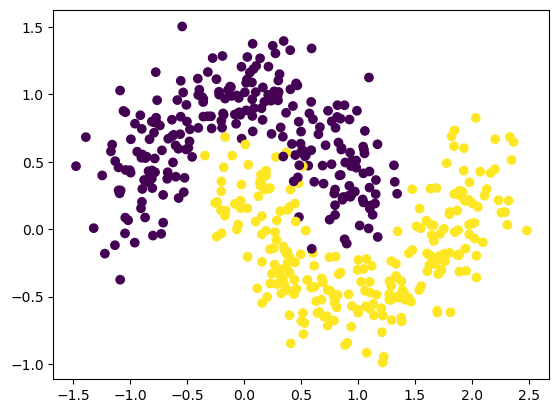

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()